# Diffusion Equation for Time Varying Diffusion constant
$\frac {dc} {dt}=\frac{d^2c}{dx^2}$

$D=tan(0.2𝜋t)$

with boundry conditions

$c(0,t)=c(l,t)=0$


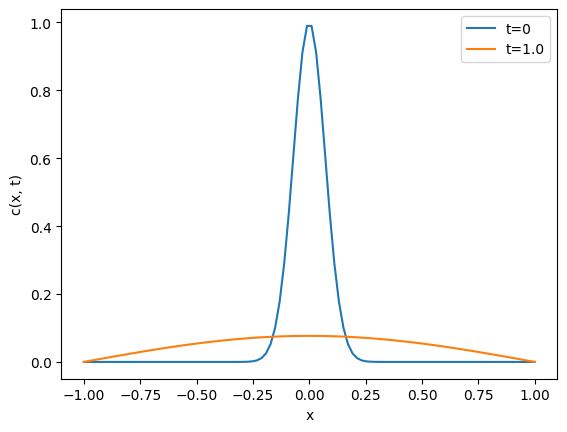

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def time_varying_diffusion_constant(t):
    return  np.tan(2 * np.pi * 0.1 * t)

x, dx = np.linspace(-1, 1, 100, retstep=True)
dt = 1e-4
T = 1.0
Niters = int(T/dt) + 1

c0 = np.exp(-100 * x * x)
c0 -= c0[0]
cs = np.zeros((len(c0), Niters))
cs[:, 0] = c0

for n in range(1, Niters):
    D = time_varying_diffusion_constant(n * dt)
    cs[1:-1, n] = cs[1:-1, n - 1] + D * dt / dx**2 * (cs[:-2, n - 1] - 2 * cs[1:-1, n - 1] + cs[2:, n - 1])

plt.plot(x, cs[:, 0], label='t=0')
plt.plot(x, cs[:, -1], label=f't={T}')
plt.xlabel('x')
plt.ylabel('c(x, t)')
plt.legend()
plt.show()


# Concentration as a fuction of time
Analytical conclusions about how the graph decays much faster than the case if the value of diffusion constant is contant

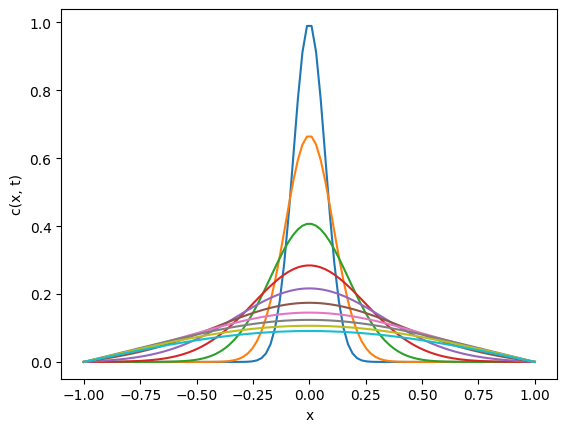

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def d2udx2(dx, u):
    up1 = np.roll(u, +1)
    um1 = np.roll(u, -1)
    return (up1 + um1 - 2 * u) / (dx * dx)

def time_varying_diffusion_constant(t):
    return np.tan(2 * np.pi * 0.1 * t)

x, dx = np.linspace(-1, 1, 100, retstep=True)
dt = 1e-4
T = 1.0
Niters = int(T/dt) + 1
cs = np.zeros((len(x), Niters))

cs[:, 0] = np.exp(-100 * x * x)
cs[:, 0] -= cs[:, 0][0]

for i in range(1, Niters):
    D = time_varying_diffusion_constant(i * dt)
    d2cdx2 = d2udx2(dx, cs[:, i - 1])
    dcdt = D * d2cdx2

    dcdt[0] = 0.0
    dcdt[-1] = 0.0

    cs[:, i] = cs[:, i - 1] + dt * dcdt

    if i % 1000 == 1:
        plt.plot(x, cs[:, i - 1])

plt.xlabel('x')
plt.ylabel('c(x, t)')
plt.show()


# `Numerical Solution to
$\frac {dc} {dt}=\frac{d^2c}{dx^2}$
for boundry conditions

$\frac {dc} {dt}|_{x=0}=\frac {dc} {dt}|_{x=l}=0$

and given the  initial condition

$c=c_0[1+acos(\frac {πx} {l})]$


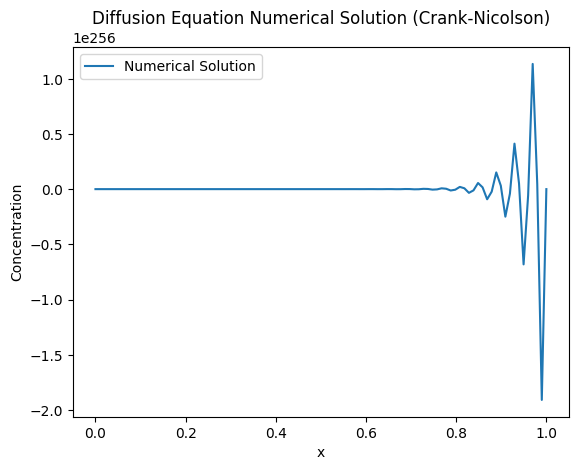

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

D = 1.0
L = 1.0
c0 = 1.0
a = 0.01
t_max = 0.1
Nx = 100
Nt = 1000

dx = L / (Nx - 1)
dt = t_max / Nt

# Initial condition
x = np.linspace(0, L, Nx)
c = c0 * (1 + a * np.cos(np.pi * x / L))

alpha = D * dt / (2 * dx**2)

for t in range(1, Nt + 1):
    c[1:Nx-1] = c[1:Nx-1] + alpha * (c[2:Nx] - 2 * c[1:Nx-1] + c[0:Nx-2])
    c[1:Nx-1] = np.linalg.solve(np.eye(Nx-2) + 2 * alpha * np.diag(np.ones(Nx-3), -1) - 2 * alpha * np.diag(np.ones(Nx-2), 0) + alpha * np.diag(np.ones(Nx-3), 1), c[1:Nx-1])

# Plotting
plt.plot(x, c, label='Numerical Solution')
plt.xlabel('x')
plt.ylabel('Concentration')
plt.title('Diffusion Equation Numerical Solution (')
plt.legend()
plt.show()
